In [2]:
"""importing all the necessary libraries for the project"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(
    r"C:\Users\tunmi\Desktop\dissertation\NACC_DATA.csv" low_memory=False
)

df.shape

(177112, 1024)

In [4]:
"""remove participants declared demented at first visit"""

df["VISIT_DATE"] = pd.to_datetime(
    {"year": df["VISITYR"], "month": df["VISITMO"], "day": df["VISITDAY"]}
)
df_first = df.sort_values("VISIT_DATE").groupby("NACCID").head(1)

demented_first = df_first.loc[df_first["DEMENTED"] == 1, "NACCID"]

df = df[~df["NACCID"].isin(demented_first)]


df.shape

(133660, 1025)

In [5]:
"""list of manually selected features"""

full_list = [
    "NACCID",
    "VISIT_DATE",
    "NACCREAS",
    "NACCREFR",
    "BIRTHMO",
    "BIRTHYR",
    "SEX",
    "HISPANIC",
    "HISPOR",
    "HISPORX",
    "RACE",
    "RACEX",
    "RACESEC",
    "RACESECX",
    "RACETER",
    "RACETERX",
    "PRIMLANG",
    "PRIMLANX",
    "EDUC",
    "MARISTAT",
    "NACCLIVS",
    "INDEPEND",
    "RESIDENC",
    "HANDED",
    "NACCAGE",
    "NACCAGEB",
    "NACCNIHR",
    "INBIRMO",
    "INBIRYR",
    "INSEX",
    "NEWINF",
    "INHISP",
    "INHISPOR",
    "INHISPOX",
    "INRACE",
    "INRACEX",
    "INRASEC",
    "INRASECX",
    "INRATER",
    "INRATERX",
    "INEDUC",
    "INRELTO",
    "INRELTOX",
    "INKNOWN",
    "INLIVWTH",
    "INVISITS",
    "INCALLS",
    "INRELY",
    "NACCNINR",
    "NACCFAM",
    "NACCMOM",
    "NACCDAD",
    "NACCFADM",
    "NACCAM",
    "NACCFFTD",
    "NACCFM",
    "NACCOM",
    "NACCOMX",
    "ANYMEDS",
    "NACCAMD",
    "NACCAHTN",
    "NACCHTNC",
    "NACCACEI",
    "NACCAAAS",
    "NACCBETA",
    "NACCCCBS",
    "NACCDIUR",
    "NACCVASD",
    "NACCANGI",
    "NACCLIPL",
    "NACCNSD",
    "NACCAC",
    "NACCADEP",
    "NACCAPSY",
    "NACCAANX",
    "NACCADMD",
    "NACCPDMD",
    "NACCEMD",
    "NACCEPMD",
    "NACCDBMD",
    "TOBAC30",
    "TOBAC100",
    "SMOKYRS",
    "PACKSPER",
    "QUITSMOK",
    "ALCOCCAS",
    "ALCFREQ",
    "CVHATT",
    "HATTMULT",
    "HATTYEAR",
    "CVAFIB",
    "CVANGIO",
    "CVBYPASS",
    "CVPACDEF",
    "CVPACE",
    "CVCHF",
    "CVANGINA",
    "CVHVALVE",
    "CVOTHR",
    "CVOTHRX",
    "STROKMUL",
    "CBSTROKE",
    "NACCSTYR",
    "CBTIA",
    "TIAMULT",
    "NACCTIYR",
    "PD",
    "PDYR",
    "PDOTHR",
    "PDOTHRYR",
    "SEIZURES",
    "TBI",
    "TBIBRIEF",
    "TRAUMBRF",
    "TBIEXTEN",
    "TRAUMEXT",
    "TBIWOLOS",
    "TRAUMCHR",
    "TBIYEAR",
    "NCOTHR",
    "DIABETES",
    "DIABTYPE",
    "HYPERTEN",
    "HYPERCHO",
    "B12DEF",
    "THYROID",
    "ARTHRIT",
    "ARTHTYPE",
    "ARTHUPEX",
    "ARTHLOEX",
    "ARTHSPIN",
    "ARTHUNK",
    "INCONTU",
    "INCONTF",
    "APNEA",
    "RBD",
    "INSOMN",
    "OTHSLEEP",
    "OTHSLEEX",
    "ALCOHOL",
    "ABUSOTHR",
    "ABUSX",
    "PTSD",
    "BIPOLAR",
    "SCHIZ",
    "DEP2YRS",
    "DEPOTHR",
    "ANXIETY",
    "OCD",
    "NPSYDEV",
    "PSYCDIS",
    "PSYCDISX",
    "NACCTBI",
    "NACCNREX",
    "NORMEXAM",
    "FOCLDEF",
    "GAITDIS",
    "EYEMOVE",
    "PARKSIGN",
    "RESTTRL",
    "RESTTRR",
    "SLOWINGL",
    "SLOWINGR",
    "RIGIDL",
    "RIGIDR",
    "BRADY",
    "PARKGAIT",
    "POSTINST",
    "CVDSIGNS",
    "CORTDEF",
    "SIVDFIND",
    "CVDMOTL",
    "CVDMOTR",
    "CORTVISL",
    "CORTVISR",
    "SOMATL",
    "SOMATR",
    "POSTCORT",
    "PSPCBS",
    "EYEPSP",
    "DYSPSP",
    "AXIALPSP",
    "GAITPSP",
    "APRAXSP",
    "APRAXL",
    "APRAXR",
    "CORTSENL",
    "CORTSENR",
    "ATAXL",
    "ATAXR",
    "ALIENLML",
    "ALIENLMR",
    "DYSTONL",
    "DYSTONR",
    "MYOCLLT",
    "MYOCLRT",
    "ALSFIND",
    "GAITNPH",
    "OTHNEUR",
    "OTHNEURX",
    "PDNORMAL",
    "SPEECH",
    "SPEECHX",
    "FACEXP",
    "FACEXPX",
    "TRESTFAC",
    "TRESTFAX",
    "TRESTRHD",
    "TRESTRHX",
    "TRESTLHD",
    "TRESTLHX",
    "TRESTRFT",
    "TRESTRFX",
    "TRESTLFT",
    "TRESTLFX",
    "TRACTRHD",
    "TRACTRHX",
    "TRACTLHD",
    "TRACTLHX",
    "RIGDNECK",
    "RIGDNEX",
    "RIGDUPRT",
    "RIGDUPRX",
    "RIGDUPLF",
    "RIGDUPLX",
    "RIGDLORT",
    "RIGDLORX",
    "RIGDLOLF",
    "RIGDLOLX",
    "TAPSRT",
    "TAPSRTX",
    "TAPSLF",
    "TAPSLFX",
    "HANDMOVR",
    "HANDMVRX",
    "HANDMOVL",
    "HANDMVLX",
    "HANDALTR",
    "HANDATRX",
    "HANDALTL",
    "HANDATLX",
    "LEGRT",
    "LEGRTX",
    "LEGLF",
    "LEGLFX",
    "ARISING",
    "ARISINGX",
    "POSTURE",
    "POSTUREX",
    "GAIT",
    "GAITX",
    "POSSTAB",
    "POSSTABX",
    "BRADYKIN",
    "BRADYKIX",
    "MEMORY",
    "ORIENT",
    "JUDGMENT",
    "COMMUN",
    "HOMEHOBB",
    "PERSCARE",
    "CDRGLOB",
    "COMPORT",
    "CDRLANG",
    "CDRSUM",
    "NOGDS",
    "SATIS",
    "DROPACT",
    "EMPTY",
    "BORED",
    "SPIRITS",
    "AFRAID",
    "HAPPY",
    "HELPLESS",
    "STAYHOME",
    "MEMPROB",
    "WONDRFUL",
    "WRTHLESS",
    "ENERGY",
    "HOPELESS",
    "BETTER",
    "NACCGDS",
    "BILLS",
    "TAXES",
    "SHOPPING",
    "GAMES",
    "STOVE",
    "MEALPREP",
    "EVENTS",
    "PAYATTN",
    "REMDATES",
    "TRAVEL",
    "B9CHG",
    "DECSUB",
    "DECIN",
    "DECCLIN",
    "DECCLCOG",
    "COGMEM",
    "COGORI",
    "COGJUDG",
    "COGLANG",
    "COGVIS",
    "COGATTN",
    "COGFLUC",
    "COGFLAGO",
    "COGOTHR",
    "COGOTHRX",
    "NACCCOGF",
    "NACCCGFX",
    "COGMODE",
    "COGMODEX",
    "DECAGE",
    "DECCLBE",
    "BEAPATHY",
    "BEDEP",
    "BEVHALL",
    "BEVWELL",
    "BEVHAGO",
    "BEAHALL",
    "BEDEL",
    "BEDISIN",
    "BEIRRIT",
    "BEAGIT",
    "BEPERCH",
    "BEREM",
    "BEREMAGO",
    "BEANX",
    "BEOTHR",
    "BEOTHRX",
    "NACCBEHF",
    "NACCBEFX",
    "BEMODE",
    "BEMODEX",
    "BEAGE",
    "DECCLMOT",
    "MOGAIT",
    "MOFALLS",
    "MOTREM",
    "MOSLOW",
    "NACCMOTF",
    "MOMODE",
    "MOMODEX",
    "MOMOPARK",
    "PARKAGE",
    "MOMOALS",
    "ALSAGE",
    "MOAGE",
    "COURSE",
    "FRSTCHG",
    "LBDEVAL",
    "FTLDEVAL",
    "MMSECOMP",
    "MMSELOC",
    "MMSELAN",
    "MMSELANX",
    "MMSEVIS",
    "MMSEHEAR",
    "MMSEORDA",
    "MMSEORLO",
    "PENTAGON",
    "NACCMMSE",
    "NPSYCLOC",
    "NPSYLAN",
    "NPSYLANX",
    "LOGIMO",
    "LOGIDAY",
    "LOGIYR",
    "LOGIPREV",
    "LOGIMEM",
    "MEMUNITS",
    "MEMTIME",
    "UDSBENTC",
    "UDSBENTD",
    "UDSBENRS",
    "DIGIF",
    "DIGIFLEN",
    "DIGIB",
    "DIGIBLEN",
    "ANIMALS",
    "VEG",
    "TRAILA",
    "TRAILARR",
    "TRAILALI",
    "TRAILB",
    "TRAILBRR",
    "TRAILBLI",
    "WAIS",
    "BOSTON",
    "UDSVERFC",
    "UDSVERFN",
    "UDSVERNF",
    "UDSVERLC",
    "UDSVERLR",
    "UDSVERLN",
    "UDSVERTN",
    "UDSVERTE",
    "UDSVERTI",
    "COGSTAT",
    "NACCC1",
    "MOCACOMP",
    "MOCAREAS",
    "MOCALOC",
    "MOCALAN",
    "MOCALANX",
    "MOCAVIS",
    "MOCAHEAR",
    "MOCATOTS",
    "NACCMOCA",
    "MOCATRAI",
    "MOCACUBE",
    "MOCACLOC",
    "MOCACLON",
    "MOCACLOH",
    "MOCANAMI",
    "MOCAREGI",
    "MOCADIGI",
    "MOCALETT",
    "MOCASER7",
    "MOCAREPE",
    "MOCAFLUE",
    "MOCAABST",
    "MOCARECN",
    "MOCARECC",
    "MOCARECR",
    "MOCAORDT",
    "MOCAORMO",
    "MOCAORYR",
    "MOCAORDY",
    "MOCAORPL",
    "MOCAORCT",
    "CRAFTVRS",
    "CRAFTURS",
    "DIGFORCT",
    "DIGFORSL",
    "DIGBACCT",
    "DIGBACLS",
    "CRAFTDVR",
    "CRAFTDRE",
    "CRAFTDTI",
    "CRAFTCUE",
    "MINTTOTS",
    "MINTTOTW",
    "MINTSCNG",
    "MINTSCNC",
    "MINTPCNG",
    "MINTPCNC",
    "NACCC2",
    "MOCBTOTS",
    "NACCMOCB",
    "REY1REC",
    "REY1INT",
    "REY2REC",
    "REY2INT",
    "REY3REC",
    "REY3INT",
    "REY4REC",
    "REY4INT",
    "REY5REC",
    "REY5INT",
    "REY6REC",
    "REY6INT",
    "OTRAILA",
    "OTRLARR",
    "OTRLALI",
    "OTRAILB",
    "OTRLBRR",
    "OTRLBLI",
    "REYDREC",
    "REYDINT",
    "REYTCOR",
    "REYFPOS",
    "VNTTOTW",
    "VNTPCNC",
    "RESPVAL",
    "RESPHEAR",
    "RESPDIST",
    "RESPINTR",
    "RESPDISN",
    "RESPFATG",
    "RESPEMOT",
    "RESPASST",
    "RESPOTH",
    "RESPOTHX",
    "ABRUPT",
    "STEPWISE",
    "SOMATIC",
    "EMOT",
    "HXHYPER",
    "HXSTROKE",
    "FOCLSYM",
    "FOCLSIGN",
    "HACHIN",
    "CVDCOG",
    "STROKCOG",
    "CVDIMAG",
    "CVDIMAG1",
    "CVDIMAG2",
    "CVDIMAG3",
    "CVDIMAG4",
    "CVDIMAGX",
    "DEMENTED",
]

num_elements = len(full_list)

print(num_elements)

501


In [6]:
"""creating a new dataframe with the full list of columns"""
df = df[full_list]
df.head()

,NACCID,VISIT_DATE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,...,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,DEMENTED
0,NACC002909,2022-12-28,7,2,5,1952,1,0,88,NaN,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0
4,NACC020208,2020-06-09,2,2,12,1950,1,1,1,NaN,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0
5,NACC038914,2022-08-11,1,2,6,1938,1,1,1,NaN,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0
7,NACC052054,2022-10-24,1,1,8,1958,2,0,88,NaN,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0
8,NACC063570,2022-08-02,1,2,1,1940,1,0,88,NaN,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0


In [7]:
"""check variables with more than 70% -4 values and drop them"""

percentages = df.eq(-4).mean() * 100
columns_to_drop = percentages[percentages > 70].index
df = df.drop(columns_to_drop, axis=1)
df.shape

(133660, 419)

In [8]:
"""check for columns with missing values and drop where necessary"""
num_columns_with_missing_values = df.isnull().any().sum()
print("Number of columns with missing values:", num_columns_with_missing_values)

"""variables with more than 70% null values"""
percentages = df.isnull().mean() * 100
columns_to_drop = percentages[percentages > 70].index
df = df.drop(columns_to_drop, axis=1)
df.shape

Number of columns with missing values: 99


(133660, 366)

In [9]:
"""drop free text columns"""
text_columns = df.select_dtypes(include=["object"]).columns

# Filtering out NACCID column
text_columns = text_columns[text_columns != "NACCID"]

df = df.drop(text_columns, axis=1)
df.shape

(133660, 364)

In [10]:
"""replace missing values with regression imputation"""
from sklearn.impute import KNNImputer

missing_cols = df.columns[df.isnull().any()]

imputer = KNNImputer(n_neighbors=3)

df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [11]:
"""using selectkbest to select features"""

X = df.drop(columns=["DEMENTED", "NACCID", "VISIT_DATE"])
y = df["DEMENTED"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k_best_features = 30
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]


print(f"Selected Features: {selected_features}")

Selected Features: Index(['INDEPEND', 'NACCADMD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN',
       'HOMEHOBB', 'PERSCARE', 'CDRGLOB', 'CDRSUM', 'BILLS', 'TAXES',
       'SHOPPING', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES',
       'TRAVEL', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN',
       'COGFLUC', 'DECAGE', 'BEREM', 'COURSE', 'FRSTCHG', 'TRAILB'],
      dtype='object')


In [12]:
"""creating a new dataframe with the selected features"""

selected_columns = ["NACCID", "DEMENTED", "VISIT_DATE"] + selected_features.tolist()
df = df[selected_columns]
df.shape

(133660, 33)

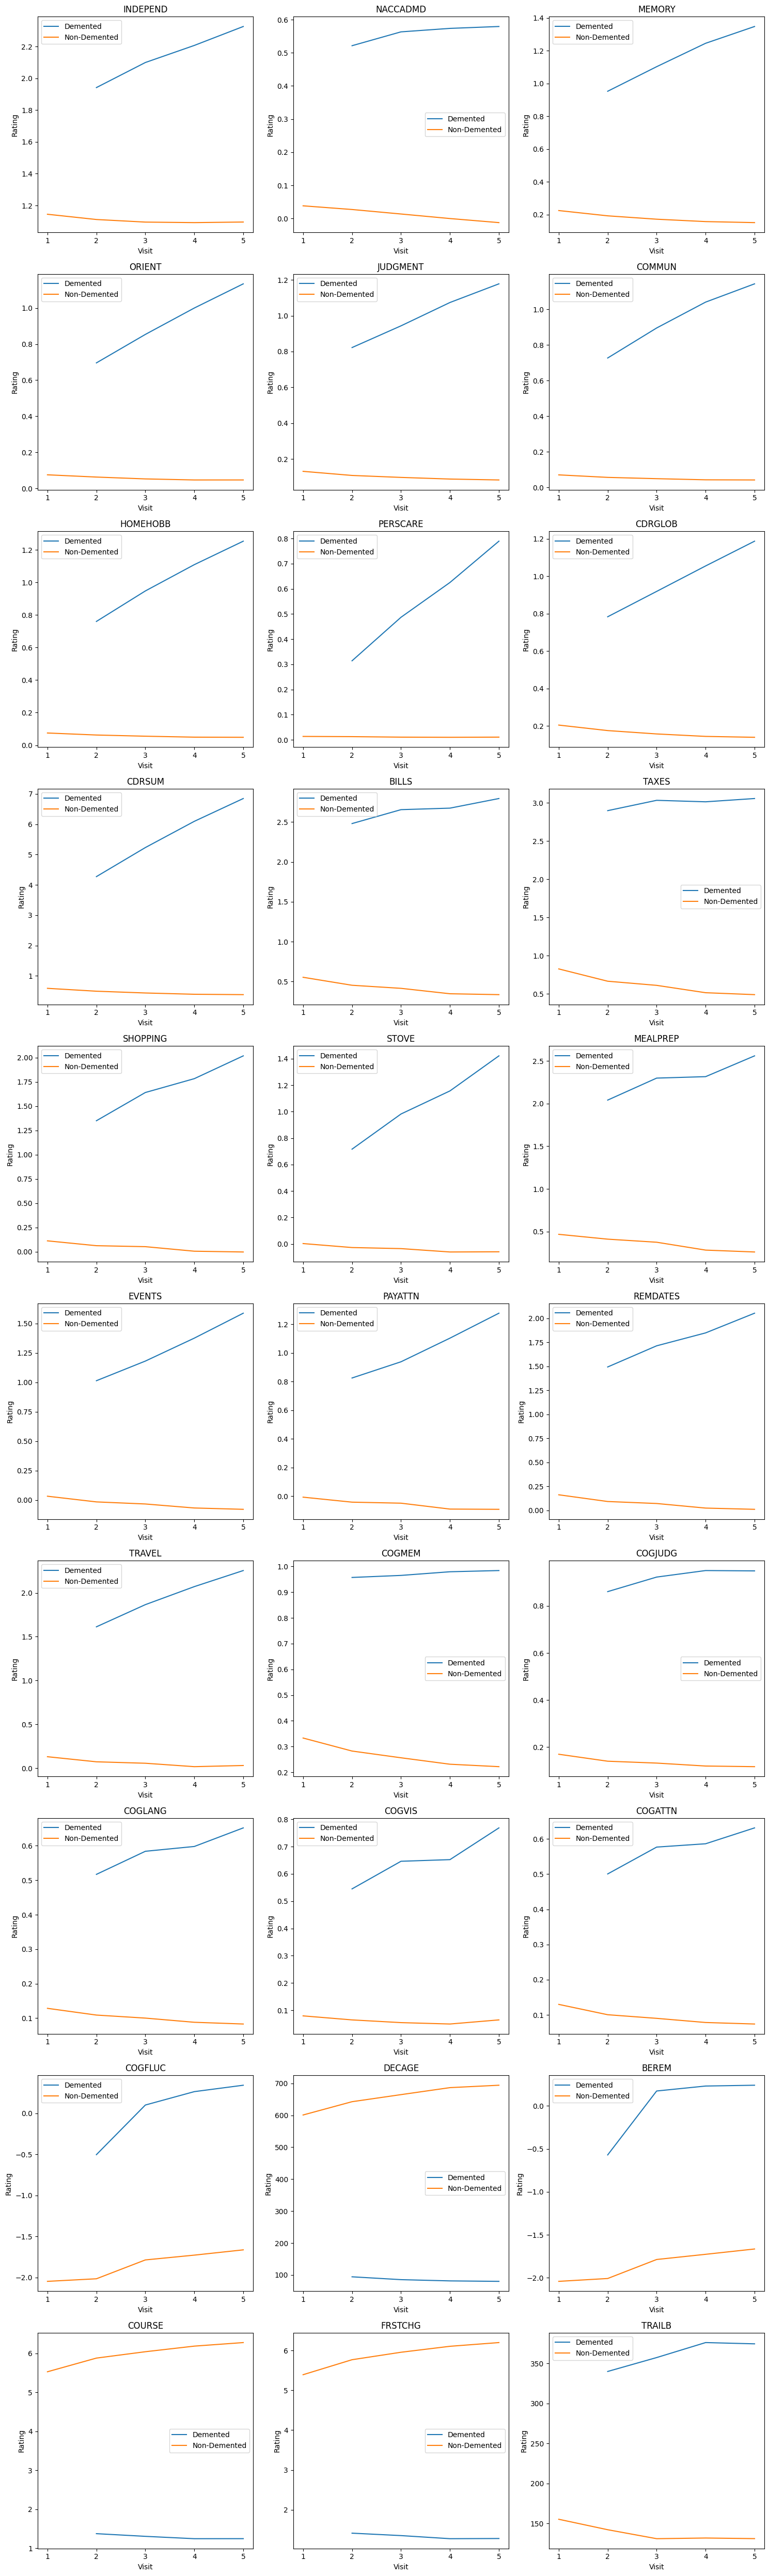

In [13]:
"""This block creates line plot for each selected feature,
showing the change in DEMENTED value over time for both groups.
The x-axis shows the visit numbers from 1 to 5."""

df["VISIT_NUM"] = df.groupby("NACCID").cumcount() + 1

df_filtered = df[df["VISIT_NUM"] <= 5]

demented = df_filtered[
    (df_filtered.DEMENTED == 1) & (df_filtered.duplicated(subset="NACCID"))
]
non_demented = df_filtered[df_filtered.DEMENTED == 0]

xticks = range(1, 6, 1)

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 50))

axs = axs.flatten()

for i, feature in enumerate(selected_features):
    ax = axs[i]
    demented.groupby("VISIT_NUM")[feature].mean().plot(ax=ax, label="Demented")
    non_demented.groupby("VISIT_NUM")[feature].mean().plot(ax=ax, label="Non-Demented")

    ax.set_title(f"{feature}")
    ax.set_xticks(xticks)
    ax.set_xlabel("Visit")
    ax.set_ylabel("Rating")
    ax.legend()

for i in range(len(selected_features), 30):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

df.drop(columns=["VISIT_NUM"], inplace=True)

In [14]:
"""divided into 2 dfs for training and testing"""

train_frac = 0.7
random_state = 42

df_train = df.sample(frac=train_frac, random_state=random_state)
df_test = df.drop(df_train.index)

In [15]:
"""create new dataframe with subjects with more than 5 visits"""

counts = df_train["NACCID"].value_counts()
df_train = df_train[df_train["NACCID"].isin(counts[counts >= 6].index)]

# Limit visits to a maximum of 6 for each participant
df_train = df_train.groupby("NACCID").head(6)
df_train.shape

In [ ]:
"""create new dataframe with subjects with more than 5 visits"""

counts = df_test["NACCID"].value_counts()
df_test = df_test[df_test["NACCID"].isin(counts[counts >= 6].index)]

# Limit visits to a maximum of 6 for each participant
df_test = df_test.groupby("NACCID").head(6)
df_test.shape

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
"""define function for creating input and output sequences"""

from collections import Counter


def create_inout_sequences(input_data, tw, duplication_factor=1):
    inout_seq = []
    grouped = input_data.sort_values("VISIT_DATE").groupby("NACCID")

    label_counts = Counter(group["DEMENTED"].values[-1] for name, group in grouped)
    minority_label = min(label_counts, key=label_counts.get)

    for name, group in grouped:
        features = group.drop(["NACCID", "VISIT_DATE", "DEMENTED"], axis=1).values
        target = group["DEMENTED"].values
        L = len(group)

        num_duplications = (
            duplication_factor if group["DEMENTED"].values[-1] == minority_label else 1
        )

        for _ in range(num_duplications):
            for i in range(L - tw - 3):
                train_seq = features[i : i + tw]
                train_label = target[i + tw : i + tw + 3]
                inout_seq.append((train_seq, train_label))

    return inout_seq

In [22]:
"""define LSTM model"""


class LSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

In [25]:
from torch.optim.lr_scheduler import StepLR

input_size = len(selected_features)
hidden_layer_size = 100
output_size = 3
initial_lr = 0.001
step_size = 10
gamma = 0.5


# Instantiate model with the best hidden layer size
model = LSTM(input_size, hidden_layer_size, output_size)
optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)
loss_function = nn.BCEWithLogitsLoss()
epochs = 100

In [26]:
training_loss = []
duplication_factor = 3  # Set this based on how imbalanced your dataset is

for epoch in range(epochs):
    epoch_loss = 0.0
    num_sequences = 0
    for i in range(3):
        # Here we pass the duplication_factor to the function
        inout_seq = create_inout_sequences(df_train, i + 1, duplication_factor)

        for seq, labels in inout_seq:
            seq = torch.FloatTensor(seq).unsqueeze(0).to(device)
            labels = torch.FloatTensor(labels).unsqueeze(0).to(device)

            optimizer.zero_grad()
            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

            epoch_loss += single_loss.item()
            num_sequences += 1

    scheduler.step()

    avg_epoch_loss = epoch_loss / num_sequences
    training_loss.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch {epoch + 1}, Train Loss: {avg_epoch_loss:.6f}, Current LR: {scheduler.get_last_lr()[0]}"
        )

Epoch 10, Train Loss: 0.075456, Current LR: 0.0005
Epoch 20, Train Loss: 0.069792, Current LR: 0.00025
Epoch 30, Train Loss: 0.065459, Current LR: 0.000125
Epoch 40, Train Loss: 0.062584, Current LR: 6.25e-05
Epoch 50, Train Loss: 0.060666, Current LR: 3.125e-05
Epoch 60, Train Loss: 0.059744, Current LR: 1.5625e-05
Epoch 70, Train Loss: 0.059200, Current LR: 7.8125e-06
Epoch 80, Train Loss: 0.058932, Current LR: 3.90625e-06
Epoch 90, Train Loss: 0.058805, Current LR: 1.953125e-06
Epoch 100, Train Loss: 0.058736, Current LR: 9.765625e-07


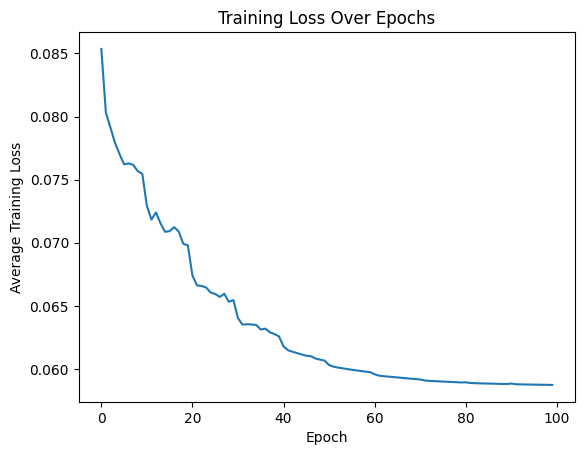

In [28]:
# Plotting the training loss
plt.plot(range(epochs), training_loss)
plt.xlabel("Epoch")
plt.ylabel("Average Training Loss")
plt.title("Training Loss Over Epochs")
plt.show()

In [29]:
"""define function for making predictions"""


def make_predictions(model, input_data, tw):
    grouped = input_data.sort_values("VISIT_DATE").groupby("NACCID")
    predictions = {}
    for name, group in grouped:
        features = group.drop(["NACCID", "VISIT_DATE", "DEMENTED"], axis=1).values
        target = group["DEMENTED"].values
        seq = torch.FloatTensor(features[:tw]).unsqueeze(0)
        if seq.shape[1] == 0:
            print(f"Warning: empty input sequence for patient {name}")
            y_pred = [0] * 3
        else:
            y_pred = model(seq)
            y_pred = (y_pred > 0.5).int().squeeze().tolist()
        actual = target[tw : tw + 3].tolist()
        predictions[name] = {"Predicted": y_pred, "Actual": actual}
    return predictions

In [30]:
"""function for calculating if demented is correctly predicted"""


def is_correct_prediction(predicted, actual):
    return 1 in predicted and 1 in actual

In [31]:
"""evaluate model on test data for one visit"""

predictions = make_predictions(model, df_test, 1)
print(f"Predictions for one visit:")

data = []
for name, pred in predictions.items():
    print(f'{name}: Predicted {pred["Predicted"]}, Actual {pred["Actual"]}')
    data.append([name, pred["Predicted"], pred["Actual"]])

df = pd.DataFrame(data, columns=["Name", "Predicted", "Actual"])
df.head(20)

Predictions for one visit:
NACC001412: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC005166: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017109: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017364: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017883: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC018256: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC019892: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC020495: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC020811: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC023681: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC025134: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC031104: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC032313: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC033797: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC034386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038012: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038862: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041238: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041994: Predicted [

,Name,Predicted,Actual
0,NACC001412,"[0, 0, 0]","[0, 0, 0]"
1,NACC005166,"[0, 0, 0]","[0, 0, 0]"
2,NACC017109,"[0, 0, 0]","[0, 0, 0]"
3,NACC017364,"[0, 0, 0]","[0, 0, 0]"
4,NACC017883,"[0, 0, 0]","[0, 0, 0]"
5,NACC018256,"[0, 0, 0]","[0, 0, 0]"
6,NACC019892,"[0, 0, 0]","[0, 0, 0]"
7,NACC020495,"[0, 0, 0]","[0, 0, 0]"
8,NACC020811,"[0, 0, 0]","[0, 0, 0]"
9,NACC023681,"[0, 0, 0]","[0, 0, 0]"


Total actual demented: 49
Predict demented and actual demented: 13
Predict demented and actual non-demented: 17
Predict non-demented and actual demented: 10
Correct predictions: 445
Accuracy: 0.95
Precision: 0.39
Recall: 0.65
F1 Score: 0.48
Confusion Matrix: [[1331   51]
 [  17   32]]

Results for one visit data input:
None


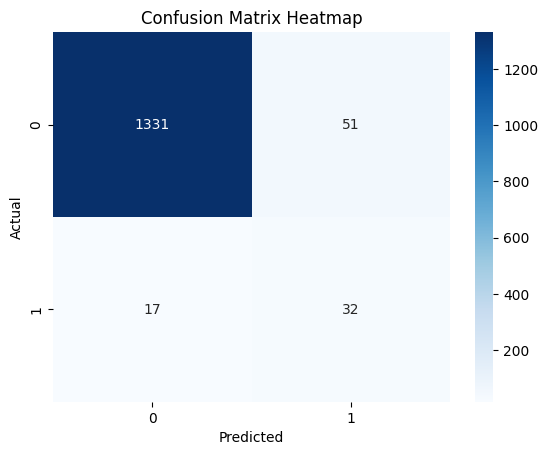

In [32]:
actual_values = []
predicted_values = []

correct_predictions = 0

for name, pred in predictions.items():
    actual_values.extend(pred["Actual"])
    predicted_values.extend(pred["Predicted"])
    if is_correct_prediction(pred["Predicted"], pred["Actual"]):
        correct_predictions += 1

# Calculate the metrics
accuracy = accuracy_score(actual_values, predicted_values)
precision = precision_score(actual_values, predicted_values)
recall = recall_score(actual_values, predicted_values)
f1 = f1_score(actual_values, predicted_values)
cf_matrix = confusion_matrix(actual_values, predicted_values)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix: {cf_matrix}")
print()


cf_matrix = confusion_matrix(actual_values, predicted_values)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [33]:
"""evaluate model on test data for two visits"""

predictions = make_predictions(model, df_test, 2)
print(f"Predictions for two visits:")

data = []
for name, pred in predictions.items():
    print(f'{name}: Predicted {pred["Predicted"]}, Actual {pred["Actual"]}')
    data.append([name, pred["Predicted"], pred["Actual"]])

df = pd.DataFrame(data, columns=["Name", "Predicted", "Actual"])
df.head(20)

Predictions for two visits:
NACC001412: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC005166: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017109: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017364: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017883: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC018256: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC019892: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC020495: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC020811: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC023681: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC025134: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC031104: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC032313: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC033797: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC034386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038012: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038862: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041238: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041994: Predicted 

,Name,Predicted,Actual
0,NACC001412,"[0, 0, 0]","[0, 0, 0]"
1,NACC005166,"[0, 0, 0]","[0, 0, 0]"
2,NACC017109,"[0, 0, 0]","[0, 0, 0]"
3,NACC017364,"[0, 0, 0]","[0, 0, 0]"
4,NACC017883,"[0, 0, 0]","[0, 0, 0]"
5,NACC018256,"[0, 0, 0]","[0, 0, 0]"
6,NACC019892,"[0, 0, 0]","[0, 0, 0]"
7,NACC020495,"[0, 0, 0]","[0, 0, 0]"
8,NACC020811,"[0, 0, 0]","[0, 0, 0]"
9,NACC023681,"[0, 0, 0]","[0, 0, 0]"


Total actual demented: 77
Predict demented and actual demented: 19
Predict demented and actual non-demented: 13
Predict non-demented and actual demented: 22
Correct predictions: 435
Accuracy: 0.94
Precision: 0.47
Recall: 0.57
F1 Score: 0.52
Confusion Matrix: [[1305   49]
 [  33   44]]

Results for two visits data input:
None


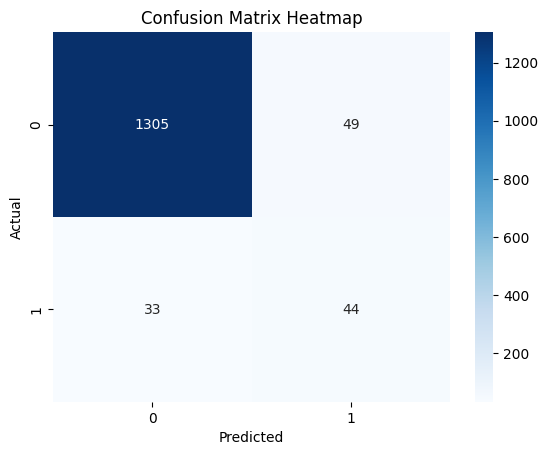

In [34]:
predictions = make_predictions(model, df_test, 2)

actual_values = []
predicted_values = []

correct_predictions = 0

for name, pred in predictions.items():
    actual_values.extend(pred["Actual"])
    predicted_values.extend(pred["Predicted"])
    if is_correct_prediction(pred["Predicted"], pred["Actual"]):
        correct_predictions += 1

# Calculate the metrics
accuracy = accuracy_score(actual_values, predicted_values)
precision = precision_score(actual_values, predicted_values)
recall = recall_score(actual_values, predicted_values)
f1 = f1_score(actual_values, predicted_values)
cf_matrix = confusion_matrix(actual_values, predicted_values)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix: {cf_matrix}")
print()


cf_matrix = confusion_matrix(actual_values, predicted_values)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [35]:
"""evaluate model on test data for three visits"""

predictions = make_predictions(model, df_test, 3)
print(f"Predictions for three visit:")

data = []
for name, pred in predictions.items():
    print(f'{name}: Predicted {pred["Predicted"]}, Actual {pred["Actual"]}')
    data.append([name, pred["Predicted"], pred["Actual"]])

df = pd.DataFrame(data, columns=["Name", "Predicted", "Actual"])
df.head(20)

Predictions for three visit:
NACC001412: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC005166: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017109: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017364: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC017883: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC018256: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC019892: Predicted [0, 0, 0], Actual [0, 0, 1]
NACC020495: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC020811: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC023681: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC025134: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC031104: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC032313: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC033797: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC034386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038012: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC038862: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041238: Predicted [0, 0, 0], Actual [0, 0, 1]
NACC041386: Predicted [0, 0, 0], Actual [0, 0, 0]
NACC041994: Predicted

,Name,Predicted,Actual
0,NACC001412,"[0, 0, 0]","[0, 0, 0]"
1,NACC005166,"[0, 0, 0]","[0, 0, 0]"
2,NACC017109,"[0, 0, 0]","[0, 0, 0]"
3,NACC017364,"[0, 0, 0]","[0, 0, 0]"
4,NACC017883,"[0, 0, 0]","[0, 0, 0]"
5,NACC018256,"[0, 0, 0]","[0, 0, 0]"
6,NACC019892,"[0, 0, 0]","[0, 0, 1]"
7,NACC020495,"[0, 0, 0]","[0, 0, 0]"
8,NACC020811,"[0, 0, 0]","[0, 0, 0]"
9,NACC023681,"[0, 0, 0]","[0, 0, 0]"


Total actual demented: 118
Predict demented and actual demented: 28
Predict demented and actual non-demented: 13
Predict non-demented and actual demented: 33
Correct predictions: 421
Accuracy: 0.93
Precision: 0.58
Recall: 0.60
F1 Score: 0.59
Confusion Matrix: [[1261   52]
 [  47   71]]

Results for three visits data input:
None


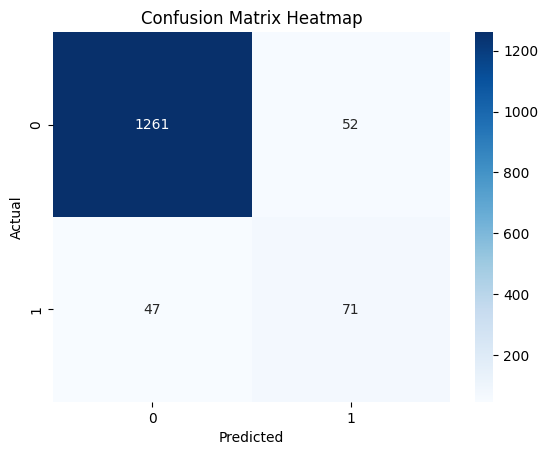

: 

In [36]:
"""evaluate model on test data for three visits"""


actual_values = []
predicted_values = []

correct_predictions = 0

for name, pred in predictions.items():
    actual_values.extend(pred["Actual"])
    predicted_values.extend(pred["Predicted"])
    if is_correct_prediction(pred["Predicted"], pred["Actual"]):
        correct_predictions += 1

# Calculate the metrics
accuracy = accuracy_score(actual_values, predicted_values)
precision = precision_score(actual_values, predicted_values)
recall = recall_score(actual_values, predicted_values)
f1 = f1_score(actual_values, predicted_values)
cf_matrix = confusion_matrix(actual_values, predicted_values)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix: {cf_matrix}")
print()


cf_matrix = confusion_matrix(actual_values, predicted_values)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()